## Use-case with the graphical user interface (GUI)

### GUI case 1: Automated *Physarum polycephalum* tracking

**Problem**: Track the surface area over time of one individual.

#### Steps
1. Launch the GUI:
```bash
Cellects
```
2. Load images via **Data Localisation**:
- Prefix: `im`
- Extension: `.tif`
- Arena number per folder: `1`

3. Image analysis → apply config, validate specimen/arena, etc.

4. Video tracking → **Done** → **Post processing** → **Read**

5. **Save one result** to export CSV time series.


## Use-cases with an application programming interface (API)

### API case 1: Automated *Physarum polycephalum* tracking

This section runs the script-based pipeline (if example data is present).


In [1]:
from pathlib import Path

DATA_DIR = Path("..") / "data"
DATA_DIR.resolve()

if not DATA_DIR.exists():
    raise FileNotFoundError(
        f"Example data folder not found: {DATA_DIR}. "
        "Run this notebook from the project root or provide the example dataset."
    )

In [ ]:
from matplotlib import pyplot as plt
from cellects.core.script_based_run import load_data, run_image_analysis, write_videos, run_all_arenas
from cellects.utils.load_display_save import show

po = load_data(pathway=str(DATA_DIR / "single_experiment"), sample_number=1, extension='tif')
po = run_image_analysis(po)
po = write_videos(po)
po.vars['frame_by_frame_segmentation'] = True
po = run_all_arenas(po)

show(po.last_image.bgr[:, :, ::-1], show=False)

# 6) Plot growth curve
plt.figure()
plt.plot(po.one_row_per_frame['time'], po.one_row_per_frame['area'])
plt.xlabel('Time (hours)')
plt.ylabel('Surface area (pixels)')
plt.title('Plasmodium growth: area over time')
plt.show()

### API case 2: Colony growth tracking (synthetic example)

**Problem**: Get the surface area over time of several appearing colonies.

This example is self-contained and should produce **plots**.


100%|██████████| 20/20 [00:01<00:00, 13.11it/s]


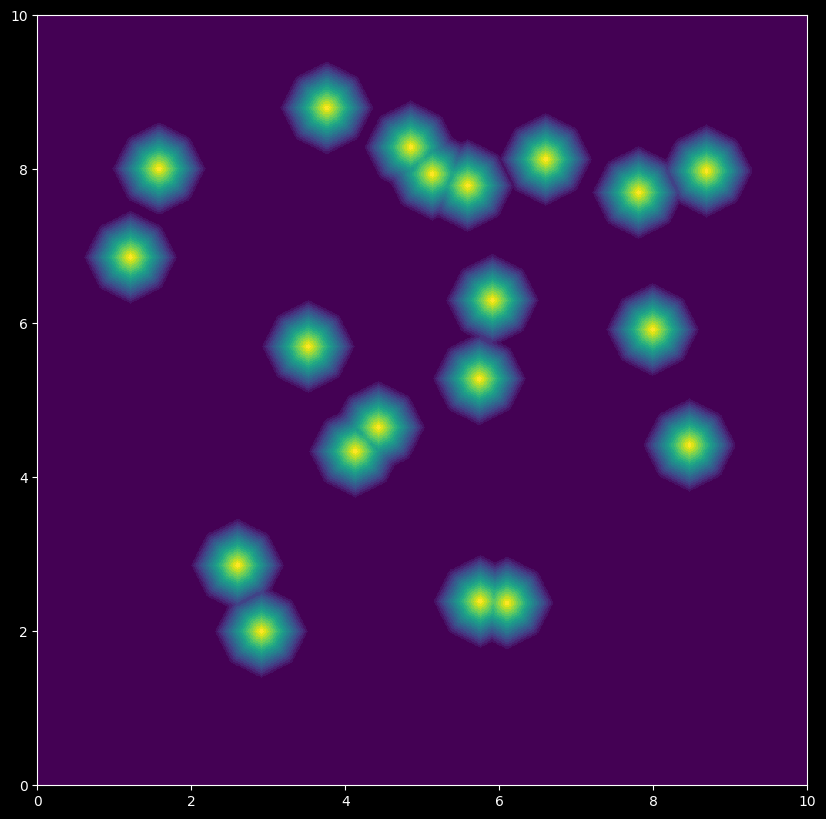

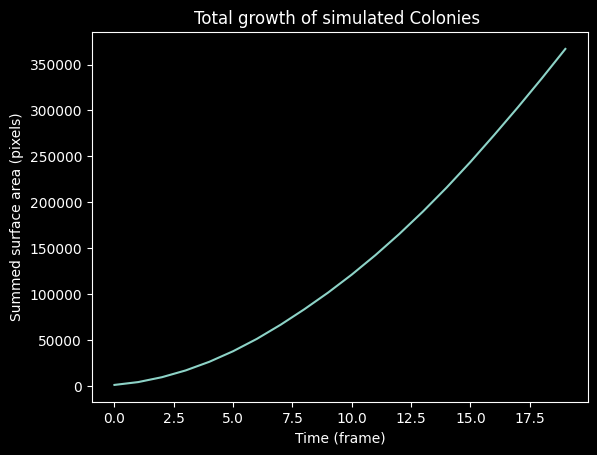

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
from cellects.utils.load_display_save import show
from cellects.core.script_based_run import (
    generate_colony_like_video,
    load_data,
    run_image_analysis,
    run_one_video_analysis,
)

# 1) Generate synthetic data
rgb_video = generate_colony_like_video()

# 2) Display (optional)
# movie(rgb_video)

# 3) Segment
po = load_data(rgb_video, pathway='')
po.vars['several_blob_per_arena'] = True
po = run_image_analysis(po, last_im=rgb_video[-1, ...])


# 4) Video tracking
po.vars['maximal_growth_factor'] = 0.5
MA = run_one_video_analysis(po, with_video_in_ram=True, remove_files=True)

# 5) Show video segmentation mask (color represent time)
show(np.cumsum(MA.binary, 0)[-1], show=False)

# 6) Plot growth curve
plt.figure()
plt.plot(MA.one_row_per_frame['time'], MA.one_row_per_frame['area_total'])
plt.xlabel('Time (frame)')
plt.ylabel('Summed surface area (pixels)')
plt.title('Total growth of simulated Colonies ')
plt.show()
